In [2]:
import pandas as pd
from miss import MISSClassifier
from experiments.util import DataLoader
import numpy as np
from contextlib import redirect_stdout, redirect_stderr
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 3)

In [3]:
X,y = DataLoader("data").load("player")

In [4]:
models = []
for n in range(6):
    with redirect_stdout(open(os.devnull, 'w')), redirect_stderr(open(os.devnull, 'w')):
        clf = MISSClassifier(mc_l0_min=n, l0_min=n, l0_max=n, mc_l0_max=n,
                                                            max_intercept=3,
                                                            max_coefficient=3, max_runtime=30*60).fit(X,y)
    models.append(clf._rho.reshape((-1,4)))
    print(n, clf.optimality_gap())
    

0 0.0
1 0.0
2 6.673604210029216e-05
3 9.940857791001168e-05
4 9.502642918781584e-05
5 9.988578940226863e-05


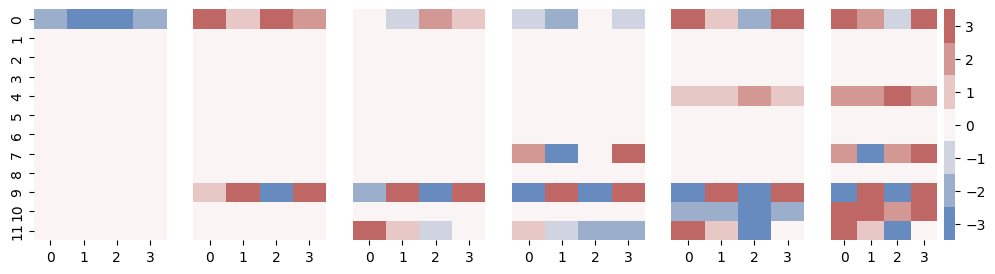

In [7]:
fig,axes = plt.subplots(1, len(models))
for i, ( model, ax) in enumerate(zip(models,axes.ravel())):
    sns.heatmap(model, ax=ax, vmax=3.5, vmin=-3.5, center=0,cbar=i==len(models)-1, cmap=sns.color_palette("vlag", 7))
    if i>0:
        ax.yaxis.set_visible(False) 